In [94]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4,suppress=True)
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, fcluster, cophenet, set_link_color_palette
from scipy.spatial.distance import squareform
from fastcluster import linkage, pdist

In [95]:
## Visualization
%matplotlib inline
import seaborn as sns

In [96]:
## Heirarchical / Agglomerative clustering is a method of Un-supervised machine learning that will help to identify clusters in the data sets
## USes any distance metric and also allows you to specify the number of clusters you want

In [97]:
housing_columns= ["crime","zone","industry","charles","no","rooms","age",
                   "distance","radial","tax","pupil","aam","lower","med_price"]
housing_data= pd.read_csv('C:/Users/Madhumitha.Ganesan/Desktop/DataScience/DataScience/data/boston_housing.csv',names=housing_columns)
housing_columns=housing_columns[:3]+housing_columns[4:]+[housing_columns[3]]
housing_data = housing_data[housing_columns]
housing_data.head()

,crime,zone,industry,no,rooms,age,distance,radial,tax,pupil,aam,lower,med_price,charles
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0


In [98]:
sc=StandardScaler()
housing_data_scaled=housing_data.copy()
housing_data_scaled[housing_columns[:-1]] = sc.fit_transform(housing_data[housing_columns[:-1]].astype(float))

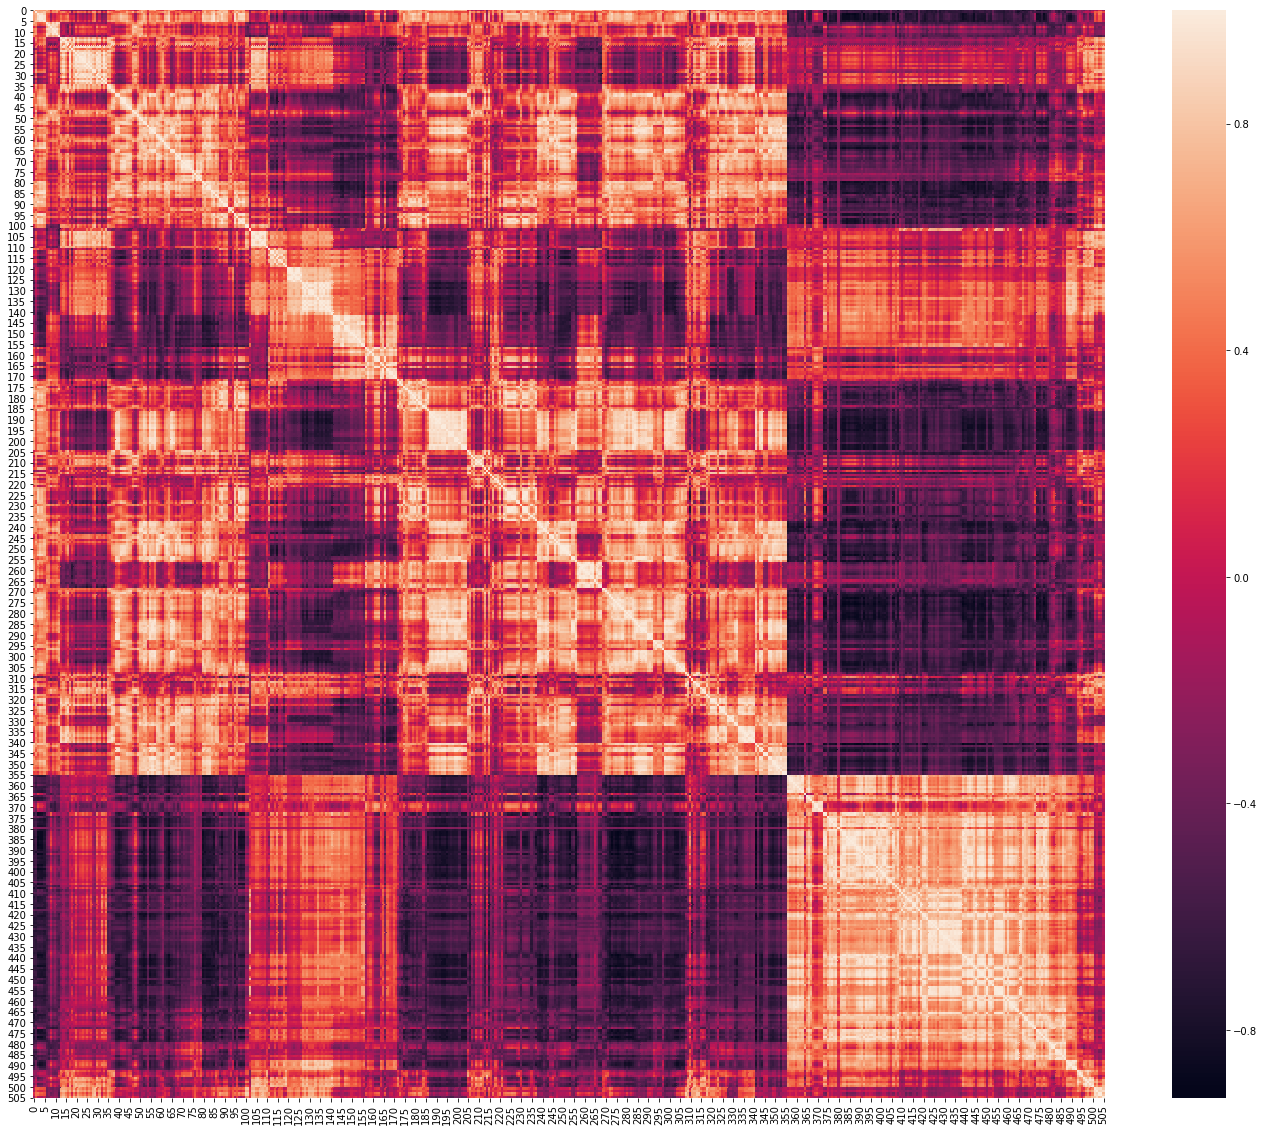

In [99]:
sns.mpl.pyplot.figure(figsize=(24,20))
sns.heatmap(housing_data_scaled.transpose().corr().values)

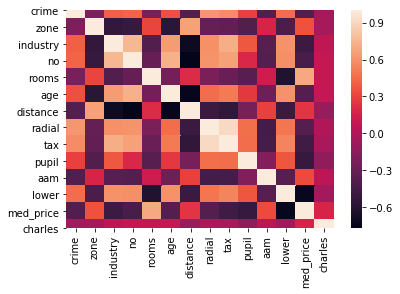

In [100]:
sns.heatmap(housing_data_scaled.corr())

In [101]:
### Hierarchical Clustering using Single Linkage method, bottom up approach 

Z_avg = linkage(housing_data_scaled,metric='euclidean',method='average')

In [102]:
print(housing_data_scaled.shape)
Z_avg[:25]

## COlumn 1,2 - Indices of points to merge
## COlumn 3 - distance b/w the points as per linear linkage
## COlumn 4 - Number of points being merged

(506, 14)


array([[320.    , 321.    ,   0.1345,   2.    ],
       [128.    , 137.    ,   0.1572,   2.    ],
       [333.    , 334.    ,   0.2223,   2.    ],
       [382.    , 383.    ,   0.2243,   2.    ],
       [130.    , 131.    ,   0.2385,   2.    ],
       [121.    , 125.    ,   0.2453,   2.    ],
       [103.    , 104.    ,   0.2492,   2.    ],
       [122.    , 124.    ,   0.2502,   2.    ],
       [441.    , 443.    ,   0.2612,   2.    ],
       [336.    , 339.    ,   0.2665,   2.    ],
       [ 42.    ,  43.    ,   0.2736,   2.    ],
       [ 13.    ,  15.    ,   0.2761,   2.    ],
       [ 70.    ,  73.    ,   0.2939,   2.    ],
       [ 90.    ,  91.    ,   0.2984,   2.    ],
       [230.    , 235.    ,   0.303 ,   2.    ],
       [127.    , 129.    ,   0.3059,   2.    ],
       [112.    , 113.    ,   0.3121,   2.    ],
       [144.    , 147.    ,   0.3304,   2.    ],
       [203.    , 204.    ,   0.336 ,   2.    ],
       [107.    , 512.    ,   0.3401,   3.    ],
       [199.    , 20

Text(0, 0.5, 'distance')

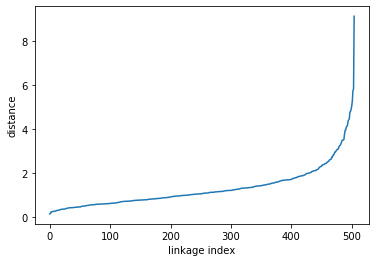

In [103]:
## Plotting the distances between the clusters
sns.mpl.pyplot.plot(np.arange(Z_avg.shape[0]),Z_avg[:,2])
sns.mpl.pyplot.xlabel("linkage index")
sns.mpl.pyplot.ylabel("distance")

In [104]:
## Pairwise distance matrix can be computed using the function pdist

distance_euclidean=pdist(housing_data_scaled,metric='euclidean')
distance_euclidean

array([1.9376, 2.2832, 2.5767, ..., 0.3742, 1.9437, 1.5898])

In [105]:
distances_sqaured=squareform(distance_euclidean)
distances_sqaured

array([[0.    , 1.9376, 2.2832, ..., 3.411 , 3.3469, 3.6056],
       [1.9376, 0.    , 2.033 , ..., 2.5359, 2.3685, 2.5252],
       [2.2832, 2.033 , 0.    , ..., 2.8233, 2.897 , 3.8165],
       ...,
       [3.411 , 2.5359, 2.8233, ..., 0.    , 0.3742, 1.9437],
       [3.3469, 2.3685, 2.897 , ..., 0.3742, 0.    , 1.5898],
       [3.6056, 2.5252, 3.8165, ..., 1.9437, 1.5898, 0.    ]])

In [106]:
## Cophenetic correlation coefficient is used to compute how well hierarchical clustering reflects intial distance matrix
avg_cophenet,coph_dists = cophenet(Z_avg,distance_euclidean)
print("Cophenetic coefficient with euclidiean distance with average linkage is ",avg_cophenet)

Cophenetic coefficient with euclidiean distance with average linkage is  0.7685972194212997


(506, 14)


Text(0, 0.5, 'distance')

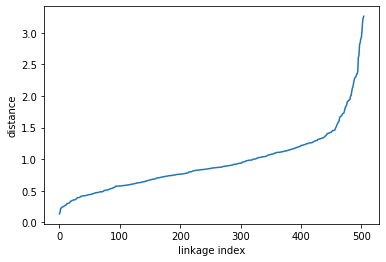

In [107]:
## Other Linkage methods for this data

##Single
Z_single = linkage(housing_data_scaled,metric='euclidean',method='single')
print(housing_data_scaled.shape)
Z_single[:25]
sns.mpl.pyplot.plot(np.arange(Z_single.shape[0]),Z_single[:,2])
sns.mpl.pyplot.xlabel("linkage index")
sns.mpl.pyplot.ylabel("distance")

In [108]:
avg_cophenet,coph_dists = cophenet(Z_single,distance_euclidean)
print("Cophenetic coefficient with euclidiean distance with single linkage is ",avg_cophenet)

Cophenetic coefficient with euclidiean distance with single linkage is  0.7076610744137858


(506, 14)


Text(0, 0.5, 'distance')

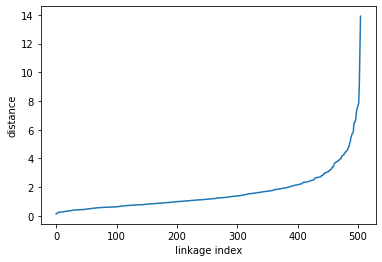

In [109]:
## Other Linkage methods for this data

##Complete
Z_complete = linkage(housing_data_scaled,metric='euclidean',method='complete')
print(housing_data_scaled.shape)
Z_complete[:25]
sns.mpl.pyplot.plot(np.arange(Z_complete.shape[0]),Z_complete[:,2])
sns.mpl.pyplot.xlabel("linkage index")
sns.mpl.pyplot.ylabel("distance")

In [110]:
avg_cophenet,coph_dists = cophenet(Z_complete,distance_euclidean)
print("Cophenetic coefficient with euclidiean distance with complete linkage is ",avg_cophenet)

Cophenetic coefficient with euclidiean distance with complete linkage is  0.699121189317156


(506, 14)


Text(0, 0.5, 'distance')

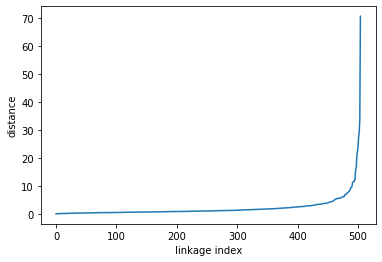

In [111]:
##Ward
Z_ward = linkage(housing_data_scaled,metric='euclidean',method='ward')
print(housing_data_scaled.shape)
Z_ward[:25]
sns.mpl.pyplot.plot(np.arange(Z_ward.shape[0]),Z_ward[:,2])
sns.mpl.pyplot.xlabel("linkage index")
sns.mpl.pyplot.ylabel("distance")

In [112]:
avg_cophenet,coph_dists = cophenet(Z_ward,distance_euclidean)
print("Cophenetic coefficient with euclidiean distance with ward linkage is ",avg_cophenet)

Cophenetic coefficient with euclidiean distance with ward linkage is  0.6586460628950042


Cophenetic coefficient with euclidiean distance with single linkage is : 0.7076610744137858


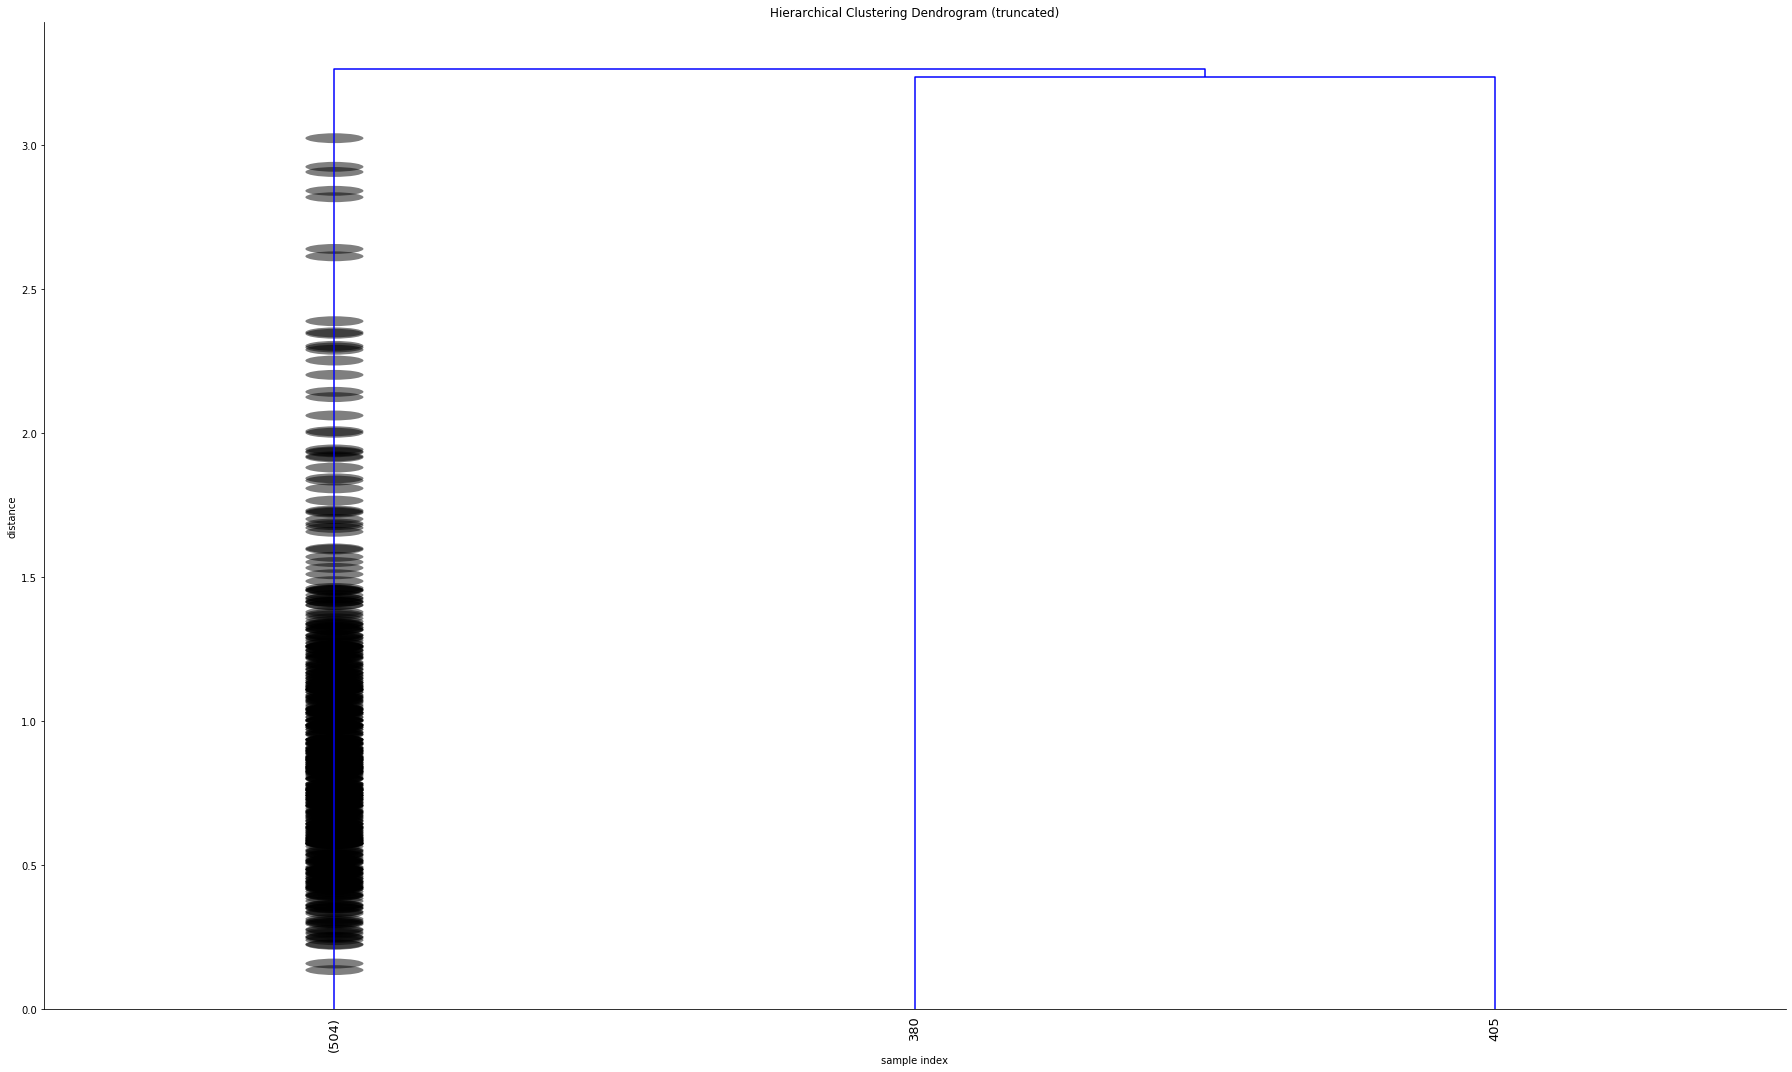

Cophenetic coefficient with euclidiean distance with average linkage is : 0.7685972194212997


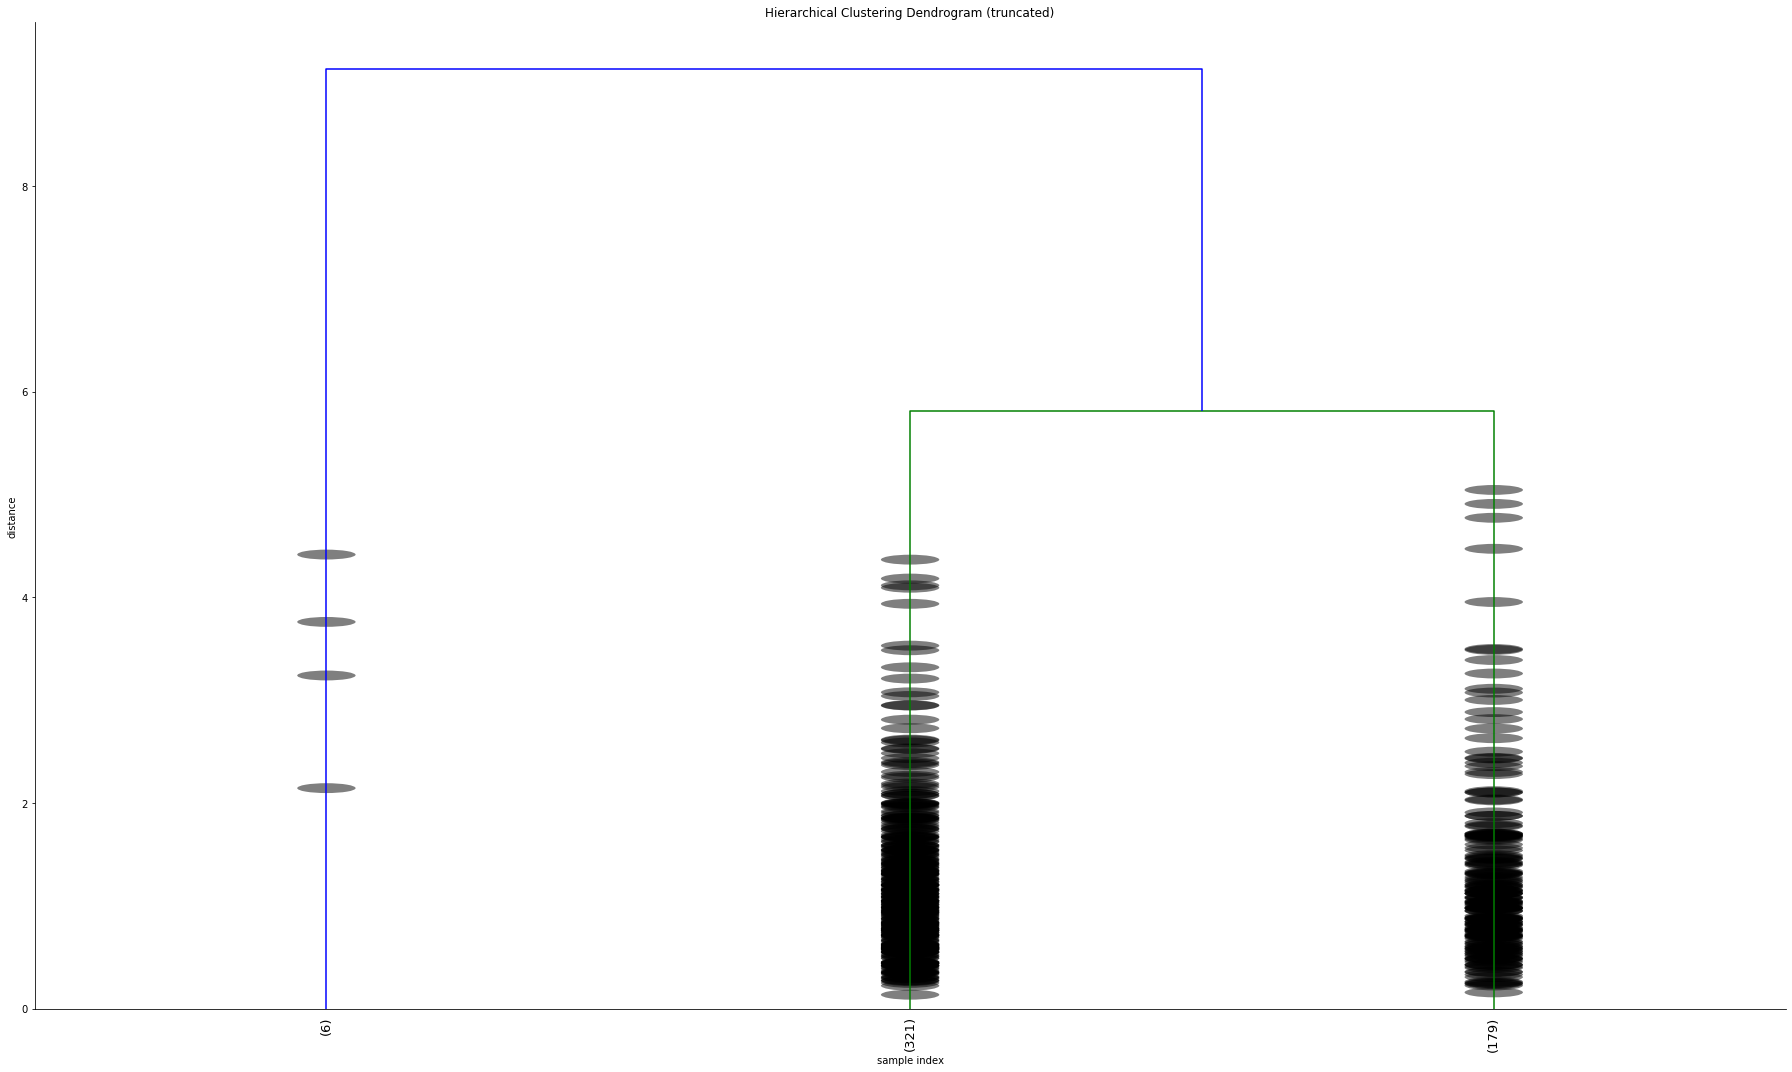

Cophenetic coefficient with euclidiean distance with complete linkage is : 0.699121189317156


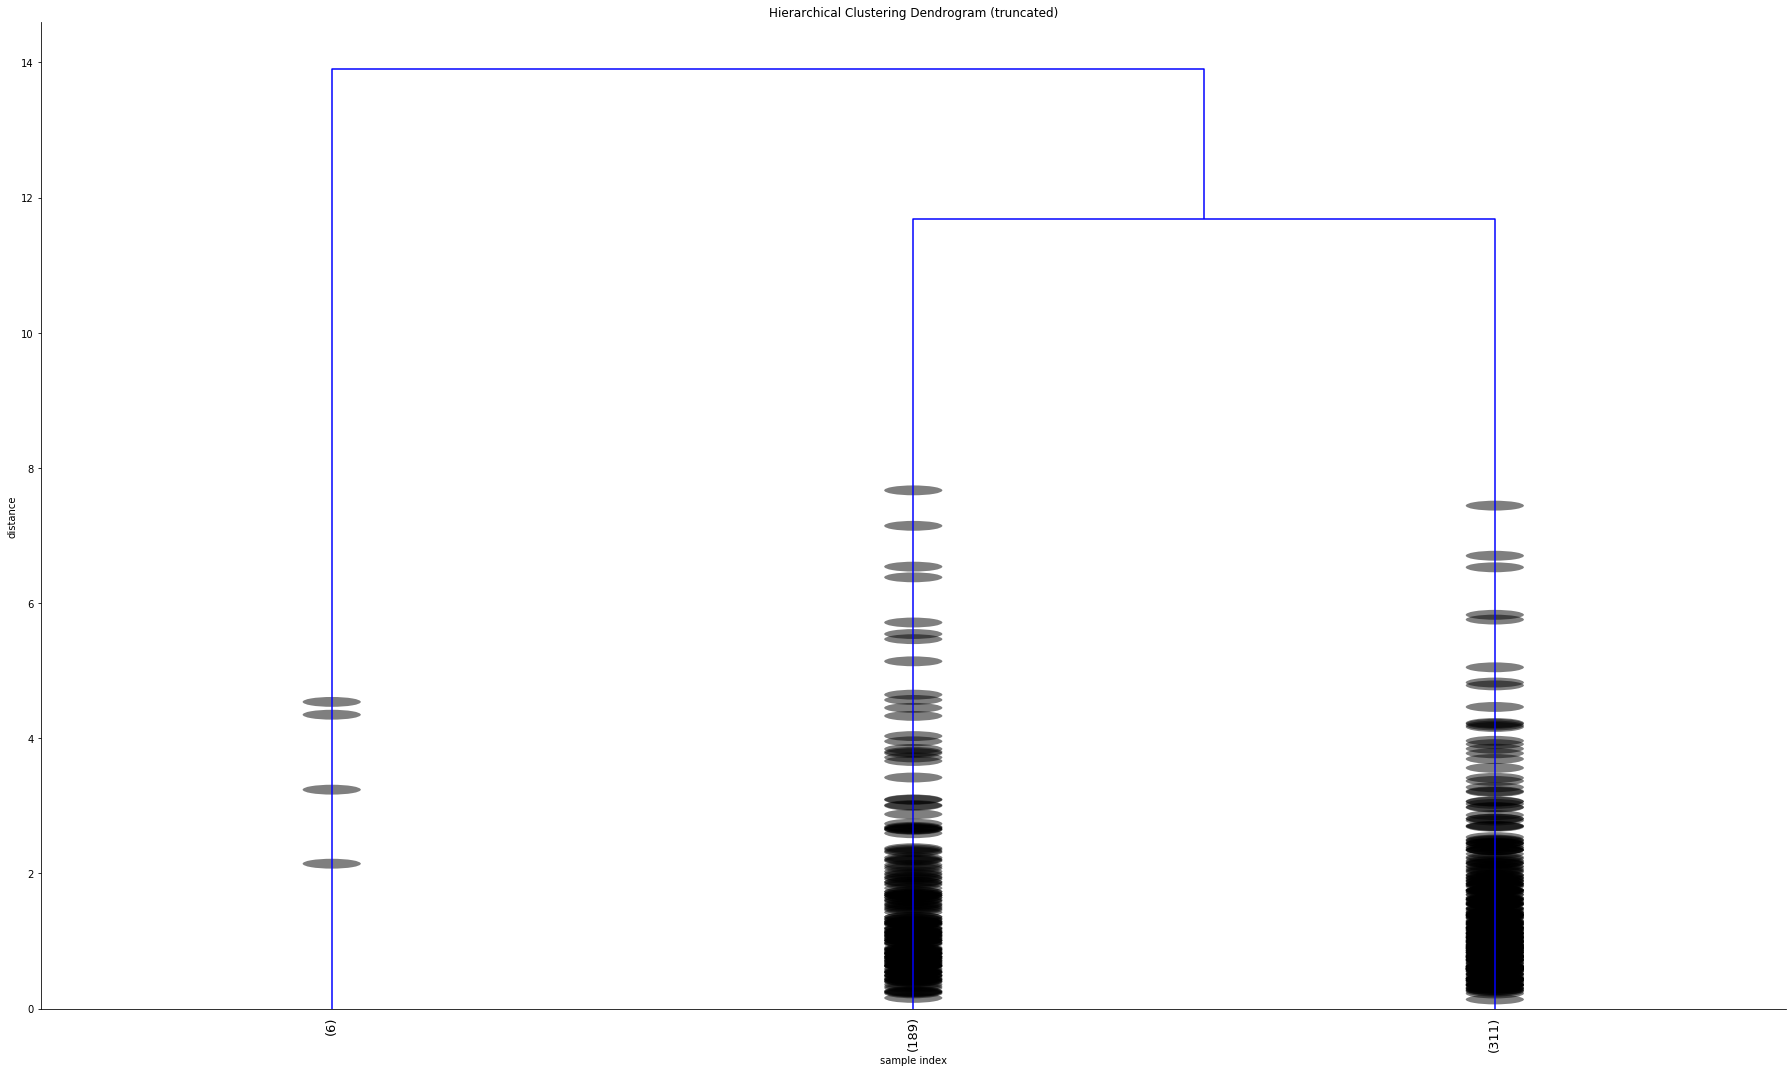

Cophenetic coefficient with euclidiean distance with ward linkage is : 0.6586460628950042


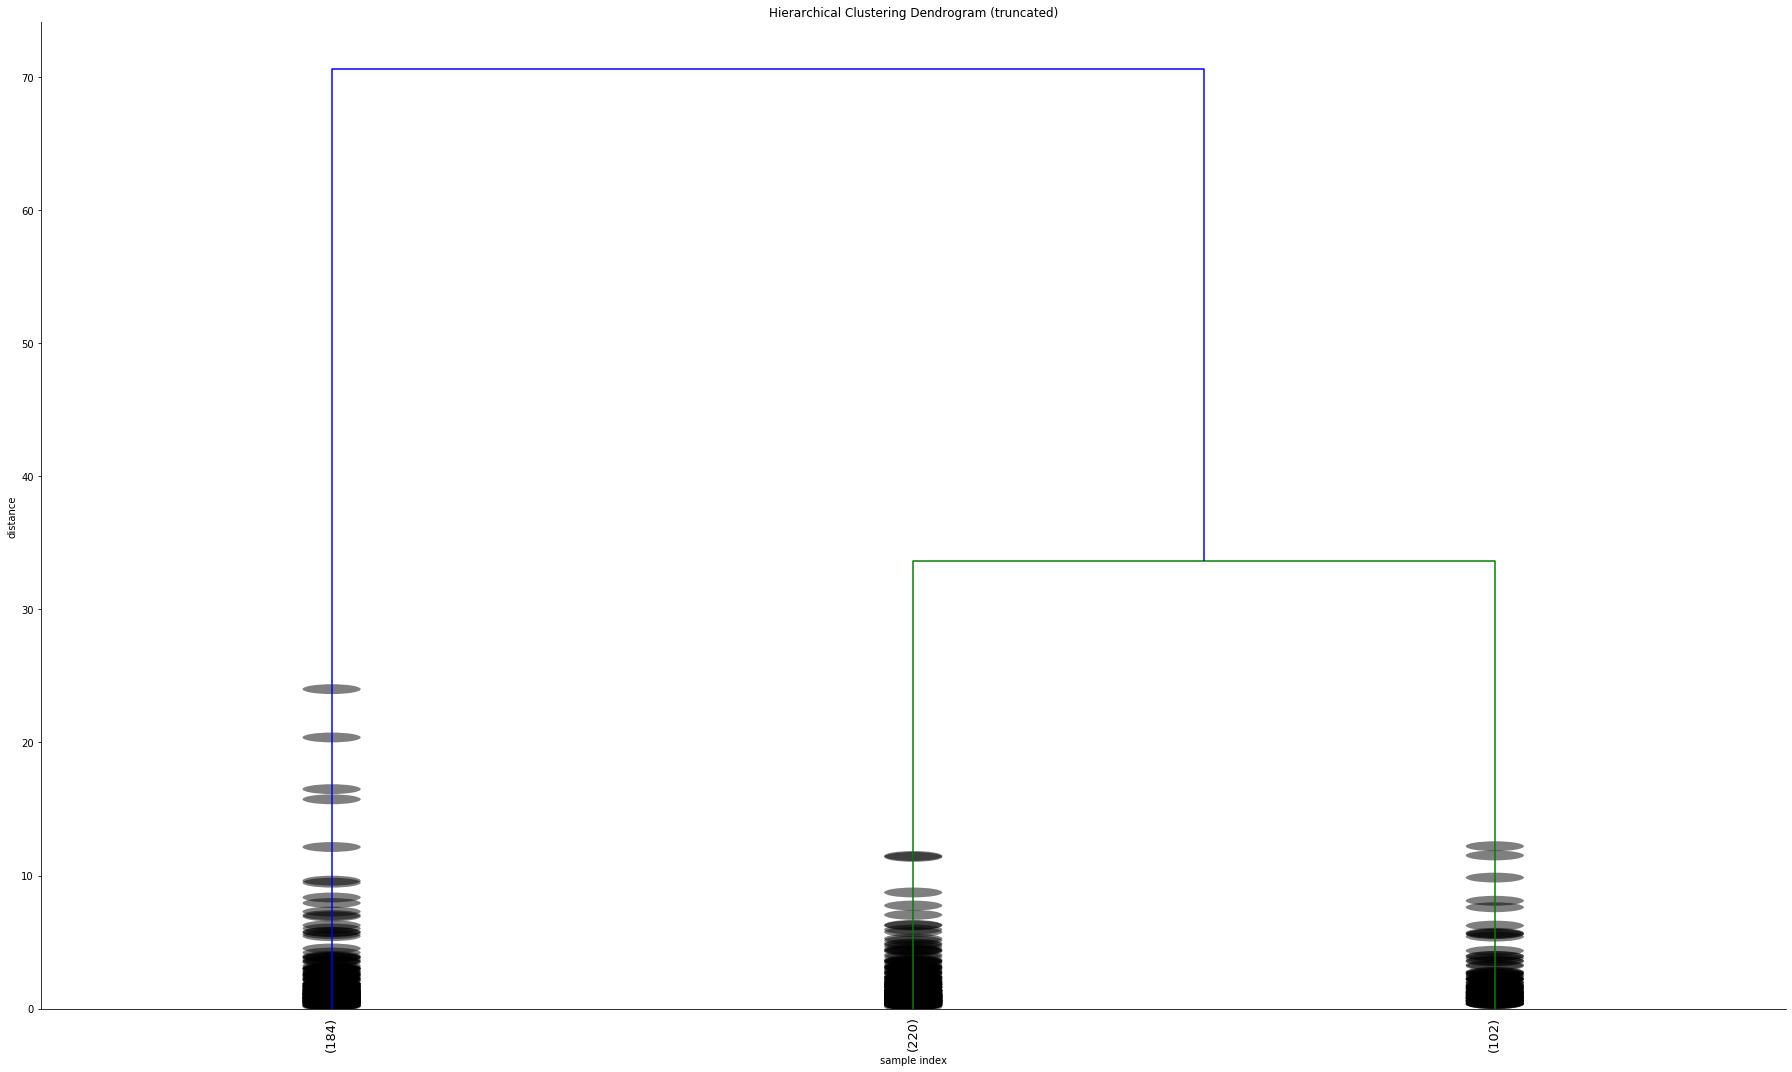

In [113]:
method_list = ['single','average','complete','ward']

for method in method_list:
    Z_method = linkage(housing_data_scaled,metric='euclidean',method=method)
    distance_euclidean=pdist(housing_data_scaled,metric='euclidean')
    avg_cophenet,coph_dists = cophenet(Z_method,distance_euclidean)
    print("Cophenetic coefficient with euclidiean distance with " + method + " linkage is :",avg_cophenet)
    
    
    ##Visualizning dendograms    
    sns.mpl.pyplot.figure(figsize=(25, 15))
    sns.mpl.pyplot.title('Hierarchical Clustering Dendrogram (truncated)')
    sns.mpl.pyplot.xlabel('sample index')
    sns.mpl.pyplot.ylabel('distance')
    dendrogram(
        Z_method,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=3,  # show only the last 3 merged clusters
        leaf_rotation=90.,
        leaf_font_size=13.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    sns.despine()

    sns.mpl.pyplot.tight_layout()
    sns.mpl.pyplot.show()

In [114]:
### GENERATING FLAT CLUSTERS FROM HIERARCHICAL CLUSTERING - SETTING THE NUMBER OF CLUSTERS YOU WANT

max_clust =3
clusters_max_3clust=fcluster(Z_avg,max_clust,criterion='maxclust')
clusters_max_3clust

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [115]:
housing_data["max_3_clusters_euclidean"] = [ "cluster_"+ str(cl) for cl in clusters_max_3clust ]
housing_data.max_3_clusters_euclidean.value_counts()

cluster_2    321
cluster_3    179
cluster_1      6
Name: max_3_clusters_euclidean, dtype: int64

LinAlgError: singular matrix

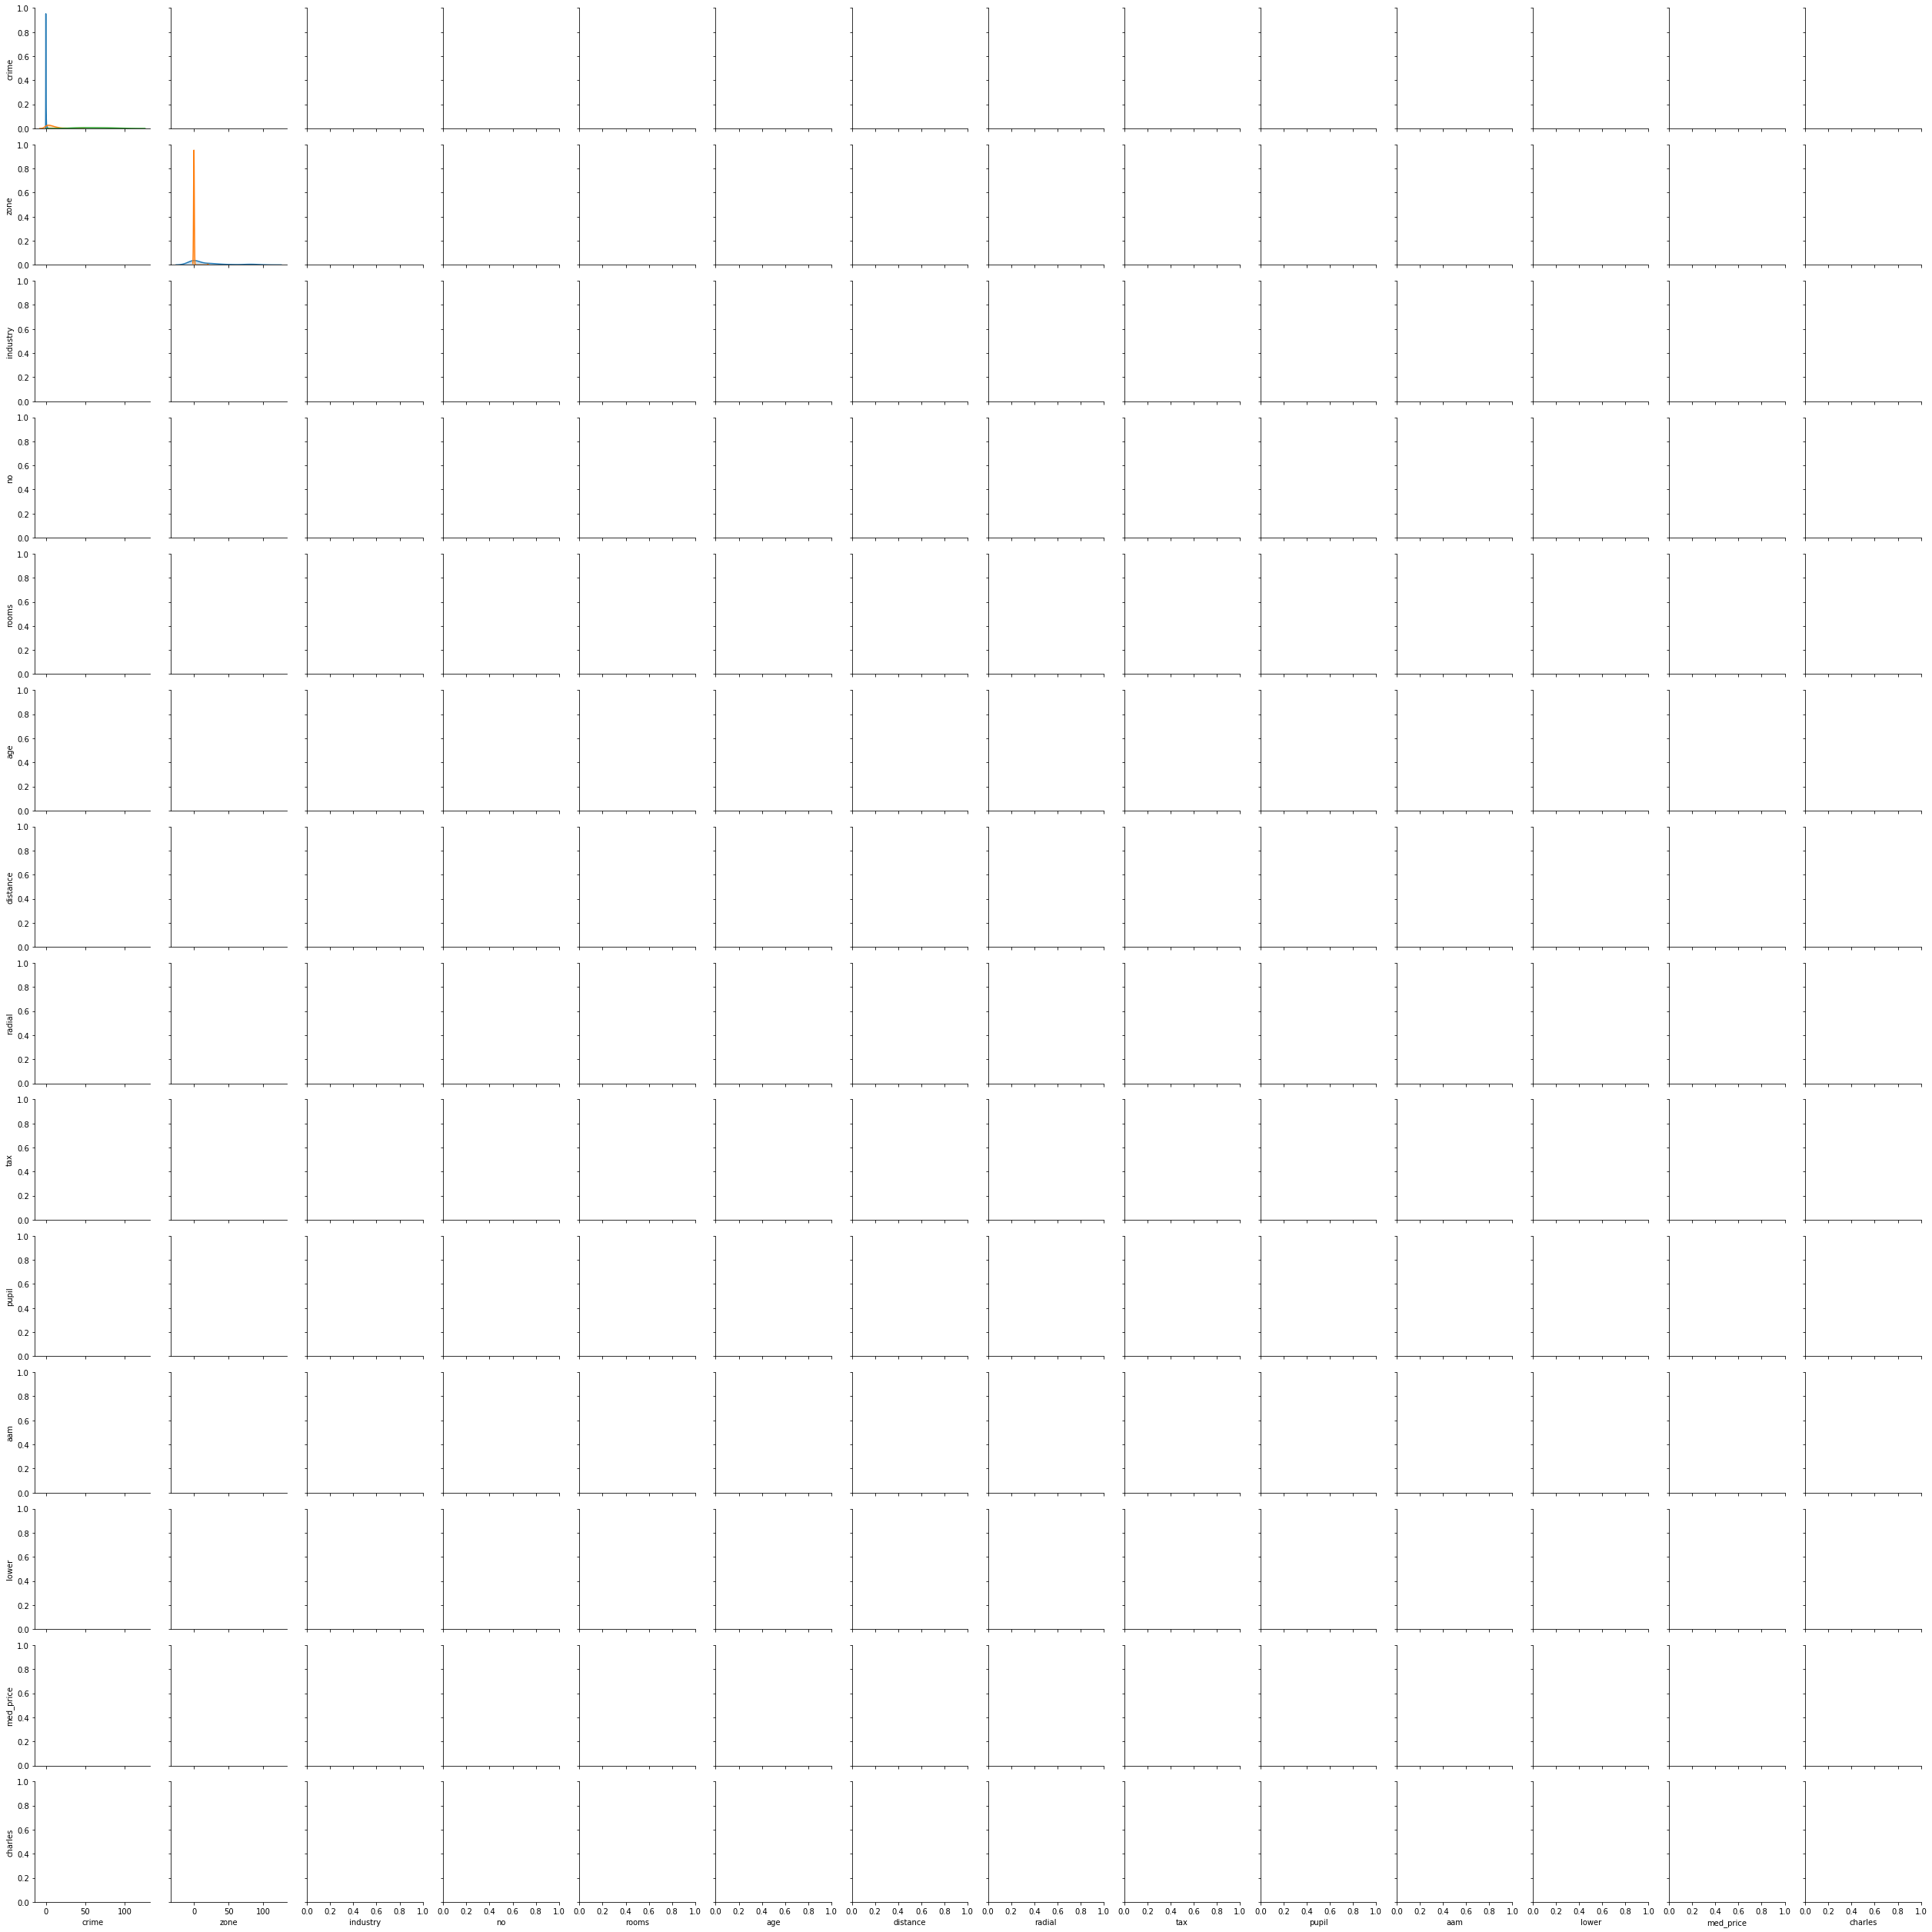

In [116]:
sns.pairplot(housing_data,hue="max_3_clusters_euclidean");

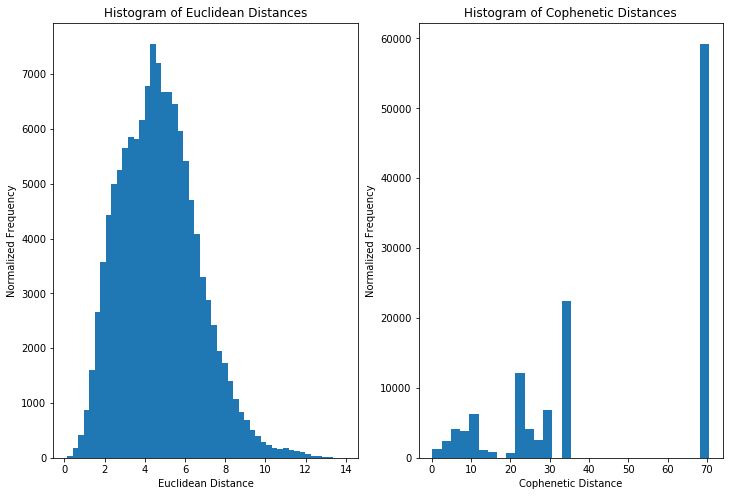

In [117]:
### Generating flat clusters from a hierarchical clustering: Setting a distance cutoff

#create a big figure
figure = sns.mpl.pyplot.figure(figsize=(12,8))
#add 4 subplots one at a time
figure.add_subplot(121)
sns.mpl.pyplot.hist(distance_euclidean, bins = 50)
sns.mpl.pyplot.xlabel("Euclidean Distance")
sns.mpl.pyplot.ylabel("Normalized Frequency")
sns.mpl.pyplot.title("Histogram of Euclidean Distances")

figure.add_subplot(122)
sns.mpl.pyplot.hist(coph_dists,bins=30)
sns.mpl.pyplot.xlabel("Cophenetic Distance")
sns.mpl.pyplot.ylabel("Normalized Frequency")
sns.mpl.pyplot.title("Histogram of Cophenetic Distances");

ImportError: Cumulative distributions are currentlyonly implemented in statsmodels.Please install statsmodels.

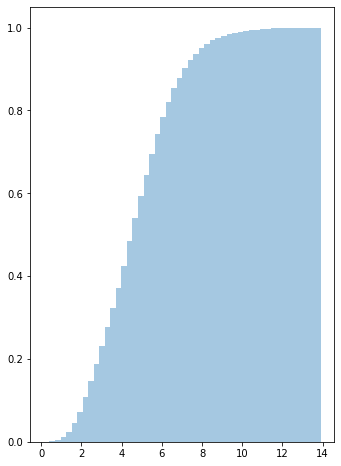

In [118]:
#create a big figure
figure = sns.mpl.pyplot.figure(figsize=(12,8))
#add 4 subplots one at a time
figure.add_subplot(121)
sns.distplot(distance_euclidean,hist_kws={"cumulative":True},kde_kws={"cumulative":True})
sns.mpl.pyplot.xlabel("Euclidean Distance")
sns.mpl.pyplot.ylabel("Cumulative Fraction of Distances")
sns.mpl.pyplot.title("Cumulative Histogram of Euclidean distances")

figure.add_subplot(122)
sns.distplot(coph_dists,hist_kws={"cumulative":True},kde_kws={"cumulative":True})
sns.mpl.pyplot.xlabel("Cophenetic Distance")
sns.mpl.pyplot.ylabel("Cumulative Fraction of Distances")
sns.mpl.pyplot.title("Cumulative Histogram of Euclidean distances");

In [120]:
max_d = 5.5
clusters_d = fcluster(Z_avg, max_d, criterion='distance')
clusters_d

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [121]:
housing_data["clusters_maxd"] = [ "cluster_"+ str(cl) for cl in clusters_d ]
housing_data.clusters_maxd.value_counts()

cluster_3    321
cluster_4    179
cluster_2      4
cluster_1      2
Name: clusters_maxd, dtype: int64

In [ ]:
sns.pairplot(housing_data,hue="clusters_maxd");

In [123]:
####Common Distance Metrics: Cosine and Correlation Distance

In [124]:
Z_cos = linkage(housing_data_scaled, metric='cosine', method='single')
k=3
clusters_cos=fcluster(Z_cos, k, criterion='maxclust')
housing_data["max_3_clusters_cosine"] = ["cluster_"+str(label) for label in clusters_cos]
housing_data.max_3_clusters_cosine.value_counts()

cluster_1    504
cluster_3      1
cluster_2      1
Name: max_3_clusters_cosine, dtype: int64

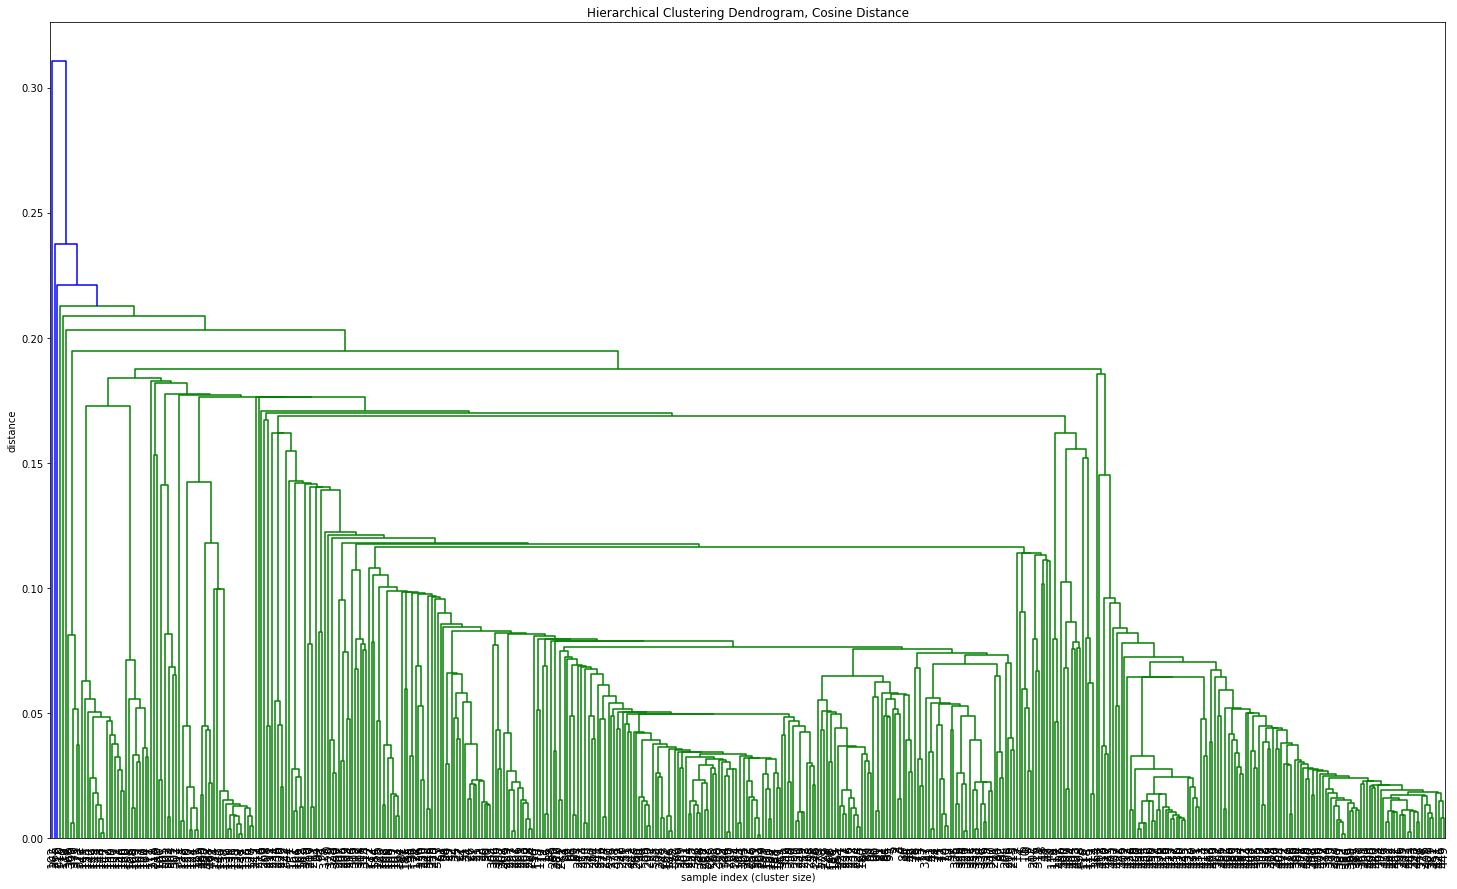

In [125]:
sns.mpl.pyplot.figure(figsize=(25, 15))
sns.mpl.pyplot.title('Hierarchical Clustering Dendrogram, Cosine Distance')
sns.mpl.pyplot.xlabel('sample index (cluster size)')
sns.mpl.pyplot.ylabel('distance')

dendrogram(
    Z_cos,
    leaf_rotation=90.,
    leaf_font_size=12.,

)
sns.mpl.pyplot.show()